In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [56]:
def plot_packet_activity(file, packets=['ARP', 'TCP', 'UDP', 'TLSv1.2', 'DNS']):
    df = pd.read_csv(file)
    for packet_type in packets:
        packets = df.loc[df['Protocol'] == packet_type]
        #get packets per second by using the bins of a histogram
        hist = np.histogram(packets['Time'], bins=int(df['Time'][df.shape[0]-1]))
        #discard last bin edge to keep same shape
        packets_per_sec, time = hist[0], hist[1][:-1] 
        
        plt.plot(time, packets_per_sec, label=packet_type)
    plt.ylabel("Packets/s")
    plt.xlabel("Time Elapsed (s)")
    plt.legend()
    plt.show()

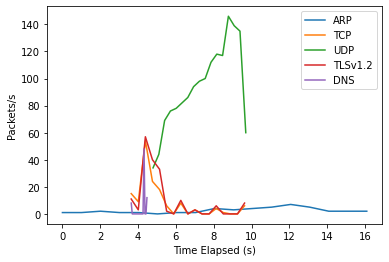

In [58]:
plot_packet_activity('../Data/zoom_full.csv')

In [59]:
df = pd.read_csv('../Data/zoom_full.csv')

In [61]:
display(df)

,No.,Time,Source,Destination,Protocol,Length,Info
0,1,0.000000,Routerbo_6a:4d:a6,NaN,ARP,62,Who has 172.16.105.87? Tell 172.16.105.1
1,2,1.024345,Routerbo_6a:4d:a6,NaN,ARP,62,Who has 172.16.105.87? Tell 172.16.105.1
2,3,2.048824,Routerbo_6a:4d:a6,NaN,ARP,62,Who has 172.16.105.87? Tell 172.16.105.1
3,4,2.974861,Routerbo_6a:4d:a6,NaN,ARP,62,Who has 172.16.105.87? Tell 172.16.105.1
4,5,3.637992,172.16.105.110,170.114.10.89,TLSv1.2,87,Encrypted Alert
...,...,...,...,...,...,...,...
2022,2023,15.054314,Routerbo_6a:4d:a6,NaN,ARP,62,Who has 172.16.105.87? Tell 172.16.105.1
2023,2024,15.463938,Routerbo_6a:4d:a6,NaN,ARP,62,Who has 172.16.105.26? Tell 172.16.105.1
2024,2025,16.078421,Routerbo_6a:4d:a6,NaN,ARP,62,Who has 172.16.105.87? Tell 172.16.105.1
2025,2026,16.488398,Routerbo_6a:4d:a6,NaN,ARP,62,Who has 172.16.105.26? Tell 172.16.105.1


In [103]:
#Some Statistics:
#Mean Time Between UDP Packets, Standard Connection
UDP_std = df.loc[df['Protocol'] == 'UDP']
UDP_mean = np.mean(np.array(UDP_std['Time'].diff()[1:]))

#Num UDP packets sent from client to Zoom servers
UDP_sent = UDP_std.loc[UDP_std['Destination'] == '198.251.135.90'].shape[0]

#Num UDP packets receieved from Zoom servers
UDP_recvd = UDP_std.loc[UDP_std['Destination'] == '172.16.105.110'].shape[0]

print(f"Mean Time: {UDP_mean:.4f}s, UDP Packets Sent: {UDP_sent}, UDP Packets Recieved: {UDP_recvd}")

Mean Time: 0.0033s, UDP Packets Sent: 600, UDP Packets Recieved: 988


In [73]:
#All IPs
dst_ips = df['Destination'].unique()[1:]
print(dst_ips)

['170.114.10.89' '170.114.10.83' '127.0.0.53' '4.2.2.2' '172.16.105.110'
 '127.0.0.1' '170.114.10.71' '198.251.148.137' '198.251.134.174'
 '198.251.148.138' '198.251.135.168' '198.251.135.90' '224.0.0.251']


In [96]:
from tabulate import tabulate

ip_relation_table = []
for ip in dst_ips:
    if ip != '172.16.105.110': #This one will overflow the table
        src_ips = df.loc[df['Destination'] == ip]['Source'].unique()
        protocols = df.loc[df['Destination'] == ip]['Protocol'].unique()
        new_row = [ip,src_ips, protocols]
        ip_relation_table.append(new_row)

In [106]:
table = tabulate(ip_relation_table, headers=["Destination IP", "Source IPs", "Protocols"], tablefmt="latex")

In [107]:
print(table)

\begin{tabular}{lll}
\hline
 Destination IP   & Source IPs         & Protocols                                  \\
\hline
 170.114.10.89    & ['172.16.105.110'] & ['TLSv1.2' 'TCP']                          \\
 170.114.10.83    & ['172.16.105.110'] & ['TLSv1.2' 'TCP']                          \\
 127.0.0.53       & ['127.0.0.1']      & ['DNS']                                    \\
 4.2.2.2          & ['172.16.105.110'] & ['DNS']                                    \\
 127.0.0.1        & ['127.0.0.53']     & ['DNS']                                    \\
 170.114.10.71    & ['172.16.105.110'] & ['TCP' 'TLSv1.2']                          \\
 198.251.148.137  & ['172.16.105.110'] & ['TCP' 'TLSv1.2']                          \\
 198.251.134.174  & ['172.16.105.110'] & ['TCP' 'TLSv1.2']                          \\
 198.251.148.138  & ['172.16.105.110'] & ['TCP' 'TLSv1.2']                          \\
 198.251.135.168  & ['172.16.105.110'] & ['TCP' 'TLSv1.2']                          \\
 198.251

[1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 1]
[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
[2 1 2 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1]
[1 0 0 0 0 0 1 1 0 0 0 0 0 3 1 0 0 0 0 1]
[1 0 0 2 0 0 2 1 0 0 2 0 0 2 0 0 2 0 0 1]
[1 0 0 0 0 0 0 2 0 0 0 0 0 2 2 0 0 0 0 1]
[1 0 0 2 0 0 2 1 0 0 2 0 0 2 0 0 2 1 0 1]


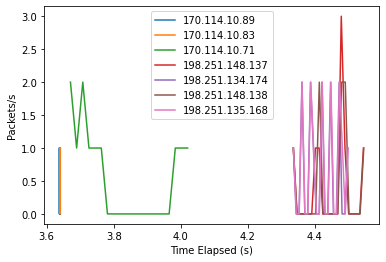

In [121]:
Zoom_ips = ['170.114.10.89', '170.114.10.83', '170.114.10.71', '198.251.148.137',
            '198.251.134.174', '198.251.148.138', '198.251.135.168']
for ip in Zoom_ips:
    packets = df.loc[df['Destination'] == ip]
    hist = np.histogram(packets['Time'], bins=20)
    packets_per_sec, time = hist[0], hist[1][:-1] 
    
    plt.plot(time, packets_per_sec, label=ip)
plt.ylabel("Packets/s")
plt.xlabel("Time Elapsed (s)")
plt.legend()
plt.show()

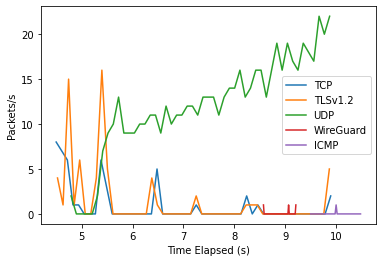

In [128]:
for packet_type in ['TCP', 'TLSv1.2', 'UDP', 'WireGuard', 'ICMP']:
    zoom_web = df.loc[df['Destination'] == '198.251.135.90']
    packets = zoom_web.loc[zoom_web['Protocol'] == packet_type]
    hist = np.histogram(packets['Time'], bins=50)
    packets_per_sec, time = hist[0], hist[1][:-1] 

    plt.plot(time, packets_per_sec, label=packet_type)
plt.ylabel("Packets/s")
plt.xlabel("Time Elapsed (s)")
plt.legend()
plt.show()

In [190]:
#Inspect first few packets establishing connection
TCP_pkts = df.loc[(df['Protocol'] == 'TCP')][10:40]
TCP_pkts = TCP_pkts[TCP_pkts['Info'].str.contains(r'Seq=0|\bSeq=0 Ack=1\b|\bSeq=1 Ack=1\b')]
TCP_pkts['Info'] = TCP_pkts['Info'].str.split('Win').str[0]
display(TCP_pkts)

,No.,Time,Source,Destination,Protocol,Length,Info
72,73,4.336414,172.16.105.110,198.251.148.137,TCP,76,45782 > 443 [SYN] Seq=0
74,75,4.336560,172.16.105.110,198.251.134.174,TCP,76,60832 > 443 [SYN] Seq=0
76,77,4.336670,172.16.105.110,198.251.148.138,TCP,76,32936 > 443 [SYN] Seq=0
78,79,4.336778,172.16.105.110,198.251.135.168,TCP,76,40088 > 443 [SYN] Seq=0
93,94,4.364232,198.251.134.174,172.16.105.110,TCP,76,"443 > 60832 [SYN, ACK] Seq=0 Ack=1"
94,95,4.364292,172.16.105.110,198.251.134.174,TCP,68,60832 > 443 [ACK] Seq=1 Ack=1
95,96,4.364551,198.251.135.168,172.16.105.110,TCP,76,"443 > 40088 [SYN, ACK] Seq=0 Ack=1"
96,97,4.364582,172.16.105.110,198.251.135.168,TCP,68,40088 > 443 [ACK] Seq=1 Ack=1
111,112,4.413346,198.251.148.137,172.16.105.110,TCP,76,"443 > 45782 [SYN, ACK] Seq=0 Ack=1"
112,113,4.413408,172.16.105.110,198.251.148.137,TCP,68,45782 > 443 [ACK] Seq=1 Ack=1


In [191]:
handshake_table = tabulate(TCP_pkts[['Source', 'Destination', 'Info']], tablefmt="latex")
print(handshake_table)

\begin{tabular}{rlll}
\hline
  72 & 172.16.105.110  & 198.251.148.137 & 45782  \ensuremath{>}  443 [SYN] Seq=0            \\
  74 & 172.16.105.110  & 198.251.134.174 & 60832  \ensuremath{>}  443 [SYN] Seq=0            \\
  76 & 172.16.105.110  & 198.251.148.138 & 32936  \ensuremath{>}  443 [SYN] Seq=0            \\
  78 & 172.16.105.110  & 198.251.135.168 & 40088  \ensuremath{>}  443 [SYN] Seq=0            \\
  93 & 198.251.134.174 & 172.16.105.110  & 443  \ensuremath{>}  60832 [SYN, ACK] Seq=0 Ack=1 \\
  94 & 172.16.105.110  & 198.251.134.174 & 60832  \ensuremath{>}  443 [ACK] Seq=1 Ack=1      \\
  95 & 198.251.135.168 & 172.16.105.110  & 443  \ensuremath{>}  40088 [SYN, ACK] Seq=0 Ack=1 \\
  96 & 172.16.105.110  & 198.251.135.168 & 40088  \ensuremath{>}  443 [ACK] Seq=1 Ack=1      \\
 111 & 198.251.148.137 & 172.16.105.110  & 443  \ensuremath{>}  45782 [SYN, ACK] Seq=0 Ack=1 \\
 112 & 172.16.105.110  & 198.251.148.137 & 45782  \ensuremath{>}  443 [ACK] Seq=1 Ack=1      \\
 114 & 198.

In [203]:
#Inspect first few packets "closing" connection
TCP_pkts = df.loc[(df['Protocol'] == 'TCP')]                 
TCP_pkts = TCP_pkts[TCP_pkts['Info'].str.contains('FIN|RST')][4:-2]
TCP_pkts['Info'] = TCP_pkts['Info'].str.split('Win').str[0]
display(TCP_pkts)

,No.,Time,Source,Destination,Protocol,Length,Info
135,136,4.482330,172.16.105.110,198.251.148.137,TCP,68,"45782 > 443 [FIN, ACK] Seq=518 Ack=1"
136,137,4.482436,172.16.105.110,198.251.148.138,TCP,68,"32936 > 443 [FIN, ACK] Seq=518 Ack=1"
139,140,4.483777,172.16.105.110,198.251.135.168,TCP,56,40088 > 443 [RST] Seq=1803
142,143,4.489580,172.16.105.110,198.251.148.137,TCP,56,45782 > 443 [RST] Seq=518
144,145,4.490603,172.16.105.110,198.251.148.137,TCP,56,45782 > 443 [RST] Seq=518
148,149,4.491353,172.16.105.110,198.251.148.137,TCP,56,45782 > 443 [RST] Seq=518
149,150,4.491378,172.16.105.110,198.251.148.138,TCP,56,32936 > 443 [RST] Seq=518
151,152,4.492340,172.16.105.110,198.251.148.138,TCP,56,32936 > 443 [RST] Seq=518
153,154,4.492579,172.16.105.110,198.251.148.138,TCP,56,32936 > 443 [RST] Seq=518
160,161,4.507724,172.16.105.110,198.251.134.174,TCP,56,60832 > 443 [RST] Seq=1844


In [204]:
handshake_table = tabulate(TCP_pkts[['Source', 'Destination', 'Info']], tablefmt="latex")
print(handshake_table)

\begin{tabular}{rlll}
\hline
 135 & 172.16.105.110  & 198.251.148.137 & 45782  \ensuremath{>}  443 [FIN, ACK] Seq=518 Ack=1     \\
 136 & 172.16.105.110  & 198.251.148.138 & 32936  \ensuremath{>}  443 [FIN, ACK] Seq=518 Ack=1     \\
 139 & 172.16.105.110  & 198.251.135.168 & 40088  \ensuremath{>}  443 [RST] Seq=1803               \\
 142 & 172.16.105.110  & 198.251.148.137 & 45782  \ensuremath{>}  443 [RST] Seq=518                \\
 144 & 172.16.105.110  & 198.251.148.137 & 45782  \ensuremath{>}  443 [RST] Seq=518                \\
 148 & 172.16.105.110  & 198.251.148.137 & 45782  \ensuremath{>}  443 [RST] Seq=518                \\
 149 & 172.16.105.110  & 198.251.148.138 & 32936  \ensuremath{>}  443 [RST] Seq=518                \\
 151 & 172.16.105.110  & 198.251.148.138 & 32936  \ensuremath{>}  443 [RST] Seq=518                \\
 153 & 172.16.105.110  & 198.251.148.138 & 32936  \ensuremath{>}  443 [RST] Seq=518                \\
 160 & 172.16.105.110  & 198.251.134.174 & 60832  \en

In [211]:
df2 = pd.read_csv('../Data/zoom_maintained.csv', encoding='latin-1')
display(df2)

,No.,Time,Source,Destination,Protocol,Length,Info
0,90,9.671883,10.38.3.199,170.114.10.74,TLSv1.2,85,Encrypted Alert
1,91,9.672291,10.38.3.199,170.114.10.74,TCP,54,"53440 > 443 [RST, ACK] Seq=32 Ack=1 Win=4095..."
2,92,9.672351,10.38.3.199,170.114.10.91,TLSv1.2,85,Encrypted Alert
3,93,9.672675,10.38.3.199,170.114.10.91,TCP,54,"53441 > 443 [RST, ACK] Seq=32 Ack=1 Win=4095..."
4,100,9.708023,10.38.3.199,170.114.10.82,TCP,78,53443 > 443 [SYN] Seq=0 Win=65535 Len=0 MSS=...
...,...,...,...,...,...,...,...
2291,4376,167.509603,10.4.35.26,224.0.0.251,MDNS,381,"Standard query response 0x0000 PTR, cache flus..."
2292,4377,167.509604,10.4.35.26,224.0.0.251,MDNS,505,"Standard query response 0x0000 TXT, cache flus..."
2293,4379,170.016807,10.38.3.199,239.255.255.250,SSDP,217,M-SEARCH * HTTP/1.1
2294,4386,171.018136,10.38.3.199,239.255.255.250,SSDP,217,M-SEARCH * HTTP/1.1
